# $k$ 近邻算法应用于手写数字识别

简单的手写数字识别，掌握 scikit-learn 机器学习库的基本使用。在这个例子中，图像像素的数值都在一定的范围内，归一化以后的效果不太明显，但这一步是必须的。

In [1]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

### 认识数据

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


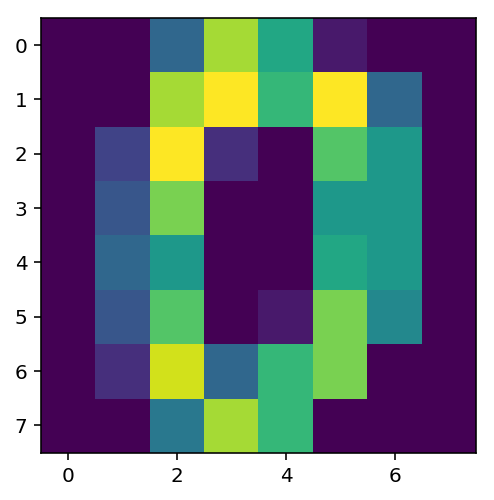

In [2]:
plt.imshow(X[0,:].reshape((8,8)))
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=666)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_scaler, y_train)
y_pred = clf.predict(X_test_scaler)
score = clf.score(X_test_scaler, y_test)
print(score)

0.9833333333333333


In [6]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(acc)

0.9833333333333333


## 使用混淆矩阵看看分类效果

In [7]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  1 41  0  1  0  0  1  0]
 [ 0  0  0  0 42  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0  0 39  0]
 [ 0  0  0  1  0  1  0  0  0 34]]


+ 非零元素都几乎都在主对角线上，表示分类效果还不错。

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        38
          1       1.00      1.00      1.00        30
          2       0.97      1.00      0.99        35
          3       0.98      0.93      0.95        44
          4       1.00      1.00      1.00        42
          5       0.94      0.97      0.95        30
          6       1.00      1.00      1.00        30
          7       1.00      1.00      1.00        36
          8       0.97      1.00      0.99        39
          9       0.97      0.94      0.96        36

avg / total       0.98      0.98      0.98       360

